In this notebook we calculate 
1. average player statistics over entire league matches 
2. variable player performance for each match
3. Encode player positions into player performance
4. Encode team formation to predict scoreline

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import os
import json

In [2]:
# Player statistics files
teamspath = glob('../../../MusicRecMix/tracks/tracksharepoint/N*/*Football*/*2425_FINAL*/*')

In [103]:
# get team names
teamnames = [os.path.basename(teampath) for teampath in teamspath]

In [105]:
teamnames.remove('Sunderland')
teamnames.remove('Burnley')
teamnames.remove('Leeds\xa0United')

In [106]:
# for each team name, remove \xa0 with a space
teaminfo = {name: {'path': f'../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/{name}'} for name in teamnames}
# replace \xa0 with space in team names
teaminfo = {name.replace('\xa0', ' '): info for name, info in teaminfo.items()}

extract player statistics for each team

In [ ]:
# for each player in each team, get all match files as below
# load info and add it to playerinfo
# extract 'name'_all.json file paths to player info


playerinfo = {}
for team, info in teaminfo.items():
    playerinfo[team] = {}
    playerpath= info['path']
    playernames = [os.path.basename(p) for p in glob(f"{playerpath}/*") if os.path.isdir(p)]
    print(team,playernames)
    for player in playernames:
        player_allfiles = glob(f"{playerpath}/{player}/*.json")
        if len(player_allfiles) == 0:
            continue
        playerinfo[team][player] = {}
        for pf in player_allfiles:
            if "all.json" not in pf:
                continue
            fname = pf.split('/')[-1].replace('_all.json','')
            playerinfo[team][player][fname] = pf

        playerinfo[team][player]['team'] = team

        # if info.json exists, load it
        infofile = f"{playerpath}/{player}/info.json"
        if os.path.exists(infofile):
            with open(infofile, 'r') as f:
                infodict = json.load(f)
            for k, v in infodict.items():
                playerinfo[team][player][k] = v

Arsenal ['Aaron Ramsdale', 'Andre Annous', 'Ayden Heaven', 'Ben White', 'Brayden Clarke', 'Bukayo Saka', 'Christian Nørgaard', 'Cristhian Mosquera', 'David Raya', 'Declan Rice', 'Eberechi Eze', 'Eddie Nketiah', 'Ethan Nwaneri', 'Gabriel Jesus', 'Gabriel Magalhães', 'Gabriel Martinelli', 'Ismeal Kabia', 'Jack Henry-Francis', 'Jack Porter', 'Jakub Kiwior', 'Jimi Gower', 'Jorginho', 'Josh Nichols', 'Jurriën Timber', 'Kai Havertz', 'Kepa Arrizabalaga', 'Kieran Tierney', 'Leandro Trossard', 'Maldini Kacurri', 'Martin Ødegaard', 'Martín Zubimendi', 'Max Dowman', 'Mikel Merino', 'Myles Lewis-Skelly', 'Nathan Butler-Oyedeji', 'Neto', 'Noni Madueke', 'Oleksandr Zinchenko', 'Piero Hincapié', 'Raheem Sterling', 'Reiss Nelson', 'Riccardo Calafiori', "Salah Oulad M'Hand", 'Takehiro Tomiyasu', 'Thomas Partey', 'Tommy Setford', 'Viktor Gyökeres', 'William Saliba']
Aston Villa ['Amadou Onana', 'Andrés García', 'Axel Disasi', 'Benjamin Broggio', 'Boubacar Kamara', 'Bradley Paul Burrowes', 'Diego Carlos

In [67]:
playerinfo['Manchester City']['Erling Haaland']

{'defense': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Erling Haaland/defense_all.json',
 'keeper_adv': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Erling Haaland/keeper_adv_all.json',
 'keeper': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Erling Haaland/keeper_all.json',
 'misc': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Erling Haaland/misc_all.json',
 'passing': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Erling Haaland/passing_all.json

In [73]:
# print first element of each json file for a player say haaland
for k,v in playerinfo['Manchester City']['Erling Haaland'].items():
    if k in ['team','position','age','height','weight','name','Footed','info']:
        continue
    with open(v, 'r') as f:
        data = json.load(f)
    #print(k, type(data))
    print(k, data[5])   


defense {'Date': '2024-09-09', 'Day': 'Mon', 'Comp': 'UEFA Nations League', 'Round': 'League B', 'Venue': 'Home', 'Result': 'W 2–1', 'Squad': 'noNorway', 'Opponent': 'atAustria', 'Start': 'Y', 'Pos': 'FW', 'Min': '90', 'Tkl': '', 'TklW': '0', 'Def 3rd': '', 'Mid 3rd': '', 'Att 3rd': '', 'Att': '', 'Tkl%': '', 'Lost': '', 'Blocks': '', 'Sh': '', 'Pass': '', 'Int': '0', 'Tkl+Int': '', 'Clr': '', 'Err': '', 'Match Report': 'Match Report'}
keeper_adv {'Date': '2024-09-09', 'Day': 'Mon', 'Comp': 'UEFA Nations League', 'Round': 'League B', 'Venue': 'Home', 'Result': 'W 2–1', 'Squad': 'noNorway', 'Opponent': 'atAustria', 'Start': 'Y', 'Pos': 'FW', 'Min': '90', 'GA': '', 'PKA': '', 'FK': '', 'CK': '', 'OG': '', 'PSxG': '', 'PSxG/SoT': '', 'PSxG+/-': '', '/90': '', 'Cmp': '', 'Att': '', 'Cmp%': '', 'Att (GK)': '', 'Thr': '', 'Launch%': '', 'AvgLen': '', 'Opp': '', 'Stp': '', 'Stp%': '', '#OPA': '', '#OPA/90': '', 'AvgDist': '', 'Match Report': 'Match Report'}
keeper {'Date': '2024-09-09', 'Day'

It seems non-PL matches data is mostly empty and hence unreliable, so we will only consider PL matches to get average player statistics

In [107]:
playerinfo = {}
for team, info in teaminfo.items():
    playerinfo[team] = {}
    playerpath= info['path']
    playernames = [os.path.basename(p) for p in glob(f"{playerpath}/*") if os.path.isdir(p)]
    print(team,playernames)
    for player in playernames:
        player_allfiles = glob(f"{playerpath}/{player}/*.json")
        if len(player_allfiles) == 0:
            continue
        playerinfo[team][player] = {}
        for pf in player_allfiles:
            if "all.json" in pf:
                continue
            fname = pf.split('/')[-1].replace('.json','')
            playerinfo[team][player][fname] = pf

        playerinfo[team][player]['team'] = team

        # if info.json exists, load it
        infofile = f"{playerpath}/{player}/info.json"
        if os.path.exists(infofile):
            with open(infofile, 'r') as f:
                infodict = json.load(f)
            for k, v in infodict.items():
                playerinfo[team][player][k] = v

Arsenal ['Aaron Ramsdale', 'Andre Annous', 'Ayden Heaven', 'Ben White', 'Brayden Clarke', 'Bukayo Saka', 'Christian Nørgaard', 'Cristhian Mosquera', 'David Raya', 'Declan Rice', 'Eberechi Eze', 'Eddie Nketiah', 'Ethan Nwaneri', 'Gabriel Jesus', 'Gabriel Magalhães', 'Gabriel Martinelli', 'Ismeal Kabia', 'Jack Henry-Francis', 'Jack Porter', 'Jakub Kiwior', 'Jimi Gower', 'Jorginho', 'Josh Nichols', 'Jurriën Timber', 'Kai Havertz', 'Kepa Arrizabalaga', 'Kieran Tierney', 'Leandro Trossard', 'Maldini Kacurri', 'Martin Ødegaard', 'Martín Zubimendi', 'Max Dowman', 'Mikel Merino', 'Myles Lewis-Skelly', 'Nathan Butler-Oyedeji', 'Neto', 'Noni Madueke', 'Oleksandr Zinchenko', 'Piero Hincapié', 'Raheem Sterling', 'Reiss Nelson', 'Riccardo Calafiori', "Salah Oulad M'Hand", 'Takehiro Tomiyasu', 'Thomas Partey', 'Tommy Setford', 'Viktor Gyökeres', 'William Saliba']
Aston Villa ['Amadou Onana', 'Andrés García', 'Axel Disasi', 'Benjamin Broggio', 'Boubacar Kamara', 'Bradley Paul Burrowes', 'Diego Carlos

In [105]:
# print first element of each json file for a player say haaland
feat_sets = set()
for k,v in playerinfo['Manchester City']['Erling Haaland'].items():
    if k in ['team','position','age','height','weight','name','Footed','info']:
        continue
    with open(v, 'r') as f:
        data = json.load(f)
    #print(k, type(data))
    print(k, data[5])
    for key in data[5].keys():
        feat_sets.add(key)


defense {'Date': '2024-09-28', 'Day': 'Sat', 'Comp': 'Premier League', 'Round': 'Matchweek 6', 'Venue': 'Away', 'Result': 'D 1–1', 'Squad': 'Manchester City', 'Opponent': 'Newcastle Utd', 'Start': 'Y', 'Pos': 'FW', 'Min': '90', 'Tkl': '0', 'TklW': '0', 'Def 3rd': '0', 'Mid 3rd': '0', 'Att 3rd': '0', 'Att': '0', 'Tkl%': '', 'Lost': '0', 'Blocks': '0', 'Sh': '0', 'Pass': '0', 'Int': '0', 'Tkl+Int': '0', 'Clr': '4', 'Err': '0', 'Match Report': 'Match Report'}
keeper {'Date': '2024-09-28', 'Day': 'Sat', 'Comp': 'Premier League', 'Round': 'Matchweek 6', 'Venue': 'Away', 'Result': 'D 1–1', 'Squad': 'Manchester City', 'Opponent': 'Newcastle Utd', 'Start': 'Y', 'Pos': 'FW', 'Min': '90', 'SoTA': '', 'GA': '', 'Saves': '', 'Save%': '', 'CS': '', 'PSxG': '', 'PKatt': '', 'PKA': '', 'PKsv': '', 'PKm': '', 'Cmp': '', 'Att': '', 'Cmp%': '', 'Att (GK)': '', 'Thr': '', 'Launch%': '', 'AvgLen': '', 'Opp': '', 'Stp': '', 'Stp%': '', '#OPA': '', 'AvgDist': '', 'Match Report': 'Match Report'}
keeper_adv {

In [109]:
# Inspired from Darian's position weight code
from collections import defaultdict

def safe_float(x):
    try:
        return float(x)
    except (ValueError, TypeError):
        return None

def process_player_summary(playername, plsummarypath):

    posset = set()

    if not os.path.exists(plsummarypath):
        return None

    with open(plsummarypath, "r", encoding="utf-8") as f:
        try:
            data = json.load(f)
        except Exception:
            return None

    pos_minutes = defaultdict(float)
    match_num = 0
    player_name = playername

    for item in data:
        min_val = safe_float(item.get("Min"))
        if min_val is None:
            continue
        match_num += 1

        pos_val = item.get("Pos", "")
        if pos_val and pos_val != "On matchday squad, but did not play":
            positions = [p for p in pos_val.replace(" ", "").split(",") if p]
            for p in positions:
                pos_minutes[p] += min_val
                posset.add(p) # assuming equal minutes if multiple positions

    total_min = sum(pos_minutes.values())
    pos_weights = {p: pos_minutes[p] / total_min if total_min > 0 else 0 for p in pos_minutes}

    return player_name, pos_weights

In [110]:
# for each player in playerinfo. process position weights and add to playerinfo

# read_playerinfo

# with open('playerinfo_final.json', 'r') as f:
#     playerinfo = json.load(f)

for team, players in playerinfo.items():
    for player, info in players.items():
        plsummarypath = info.get('summary')
        print(player, plsummarypath)
        if not plsummarypath:
            continue
        result = process_player_summary(player, plsummarypath)
        if result is None:
            continue
        player_name, pos_weights = result
        playerinfo[team][player]['position_weights'] = pos_weights

Aaron Ramsdale ../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Arsenal/Aaron Ramsdale/summary.json
Andre Annous ../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Arsenal/Andre Annous/summary.json
Ayden Heaven ../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Arsenal/Ayden Heaven/summary.json
Ben White ../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Arsenal/Ben White/summary.json
Brayden Clarke ../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Arsenal/Brayden Clarke/summary.json
Bukayo Saka ../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore

In [111]:
playerinfo['Manchester City']['Bernardo Silva']

{'defense': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Bernardo Silva/defense.json',
 'info': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Bernardo Silva/info.json',
 'keeper': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Bernardo Silva/keeper.json',
 'keeper_adv': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Bernardo Silva/keeper_adv.json',
 'misc': '../../../MusicRecMix/tracks/tracksharepoint/National University of Singapore/Sandesh Sreepathy Upadhyaya - Football Dataset/2425_FINAL/Manchester\xa0City/Bernardo Silva/misc.json',
 'passing': '../../../M

In [112]:
def split_WB_posset(weights, posset):
    w_WB = weights.get('WB', 0)
    if w_WB == 0:
        return weights, posset  # 没有 WB，直接返回

    # 定义左右位置集合
    left_positions = ['LB','LM','LW']
    right_positions = ['RB','RM','RW']

    total_L = sum(weights.get(p,0) for p in left_positions)
    total_R = sum(weights.get(p,0) for p in right_positions)
    total = total_L + total_R

    if total == 0:
        ratio_L, ratio_R = 0.5, 0.5
    else:
        ratio_L = total_L / total
        ratio_R = total_R / total

    # 拆分 WB 权重
    w_LWB = w_WB * ratio_L
    w_RWB = w_WB * ratio_R

    # 更新 weights
    new_weights = weights.copy()
    new_weights.pop('WB')
    if w_LWB > 0:
        new_weights['LWB'] = w_LWB
    if w_RWB > 0:
        new_weights['RWB'] = w_RWB

    # 更新 posset
    new_posset = [p for p in posset if p != 'WB']
    if w_LWB > 0:
        new_posset.append('LWB')
    if w_RWB > 0:
        new_posset.append('RWB')

    return new_weights, new_posset

In [113]:
# for each player in each team, process position weights
for team, players in playerinfo.items():
    for player, info in players.items():
        pos_weights = info.get('position_weights', {})
        posset = list(pos_weights.keys())
        new_weights, new_posset = split_WB_posset(pos_weights, posset)
        playerinfo[team][player]['position_weights'] = new_weights
        playerinfo[team][player]['position_set'] = new_posset

In [114]:
for players in playerinfo['Manchester City'].keys():
    if 'LWB' in playerinfo['Manchester City'][players]['position_weights']:
        print(players, playerinfo['Manchester City'][players]['position_weights'], playerinfo['Manchester City'][players]['position_set'])

Rayan Aït-Nouri {'LB': 0.2612390350877193, 'LM': 0.01617324561403509, 'LW': 0.024396929824561403, 'CB': 0.07401315789473684, 'AM': 0.024671052631578948, 'LWB': 0.5995065789473685} ['LB', 'LM', 'LW', 'CB', 'AM', 'LWB']


In [115]:
# set of all positions

pos_sets = set()
for team, players in playerinfo.items():
    for player, info in players.items():
        pos_weights = info.get('position_weights', {})
        for pos in pos_weights.keys():
            pos_sets.add(pos)   

In [116]:
pos_sets

{'AM',
 'CB',
 'CM',
 'DM',
 'FW',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB'}

/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


AM [ 2.03238432 -0.68129795]
CB [-4.09156909  1.39015186]
CM [ 0.25705013 -0.06793619]
DM [-1.97095965  0.68615281]
FW [ 4.92446877 -1.73996182]
LB [-3.33364212 -1.45059825]
LM [-0.24670563 -2.4182594 ]
LW [ 2.02234622 -3.43292381]
LWB [-2.24591424 -1.87816619]
RB [-1.74359951  3.1959108 ]
RM [1.29926756 2.07059027]
RW [3.71488932 1.45461715]
RWB [-0.6180161   2.87172071]


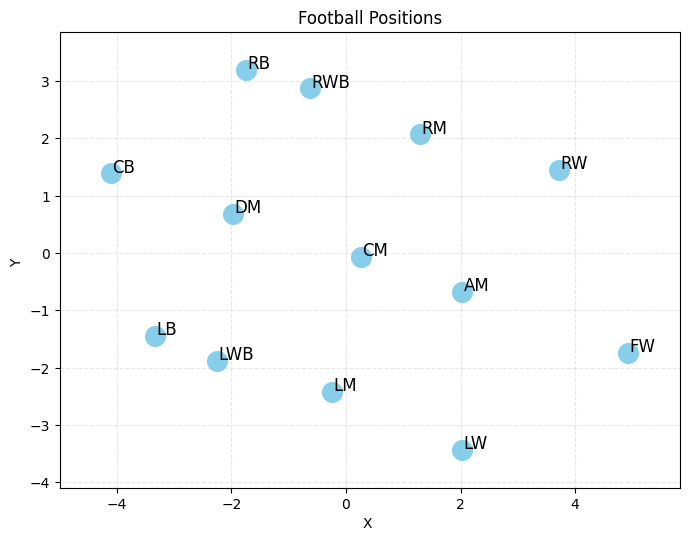

In [7]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

distances = {
    ('FW','AM'): 4,
    ('FW','LW'): 2,
    ('FW','RW'): 2,
    ('FW','LM'): 5,
    ('FW','RM'): 5,
    ('FW','LWB'): 7,
    ('FW','RWB'): 7,
    ('FW','LB'): 8,
    ('FW','RB'): 8,
    ('FW','CM'): 7,
    ('FW','DM'): 8,
    ('FW','CB'): 9,

    ('AM','LW'): 2,
    ('AM','RW'): 2,
    ('AM','LM'): 2,
    ('AM','RM'): 2,
    ('AM','LWB'): 5,
    ('AM','RWB'): 5,
    ('AM','LB'): 6,
    ('AM','RB'): 6,
    ('AM','CM'): 1,
    ('AM','DM'): 4,
    ('AM','CB'): 7,

    ('CM','LW'): 4,
    ('CM','RW'): 4,
    ('CM','LM'): 2,
    ('CM','RM'): 2,
    ('CM','LWB'): 4,
    ('CM','RWB'): 4,
    ('CM','LB'): 4,
    ('CM','RB'): 4,
    ('CM','DM'): 1,
    ('CM','CB'): 6,

    ('DM','LW'): 6,
    ('DM','RW'): 6,
    ('DM','LM'): 4,
    ('DM','RM'): 4,
    ('DM','LWB'): 2,
    ('DM','RWB'): 2,
    ('DM','LB'): 3,
    ('DM','RB'): 3,
    ('DM','CB'): 2,

    ('CB','LW'): 7,
    ('CB','RW'): 7,
    ('CB','LM'): 6,
    ('CB','RM'): 6,
    ('CB','LWB'): 4,
    ('CB','RWB'): 4,
    ('CB','LB'): 2,
    ('CB','RB'): 2,

    ('LB','LW'): 5,
    ('LB','RW'): 9,
    ('LB','LM'): 2,
    ('LB','RM'): 6,
    ('LB','LWB'): 1,
    ('LB','RWB'): 5,
    ('LB','RB'): 4,

    ('RB','LW'): 9,
    ('RB','RW'): 5,
    ('RB','LM'): 6,
    ('RB','RM'): 2,
    ('RB','LWB'): 5,
    ('RB','RWB'): 1,

    ('RWB','LW'): 8,
    ('RWB','RW'): 4,
    ('RWB','LM'): 5,
    ('RWB','RM'): 1,
    ('RWB','LWB'): 4,

    ('LWB','LW'): 4,
    ('LWB','RW'): 8,
    ('LWB','LM'): 1,
    ('LWB','RM'): 5,

    ('LM','LW'): 1,
    ('LM','RW'): 7,
    ('LM','RM'): 4,

    ('RM','LW'): 7,
    ('RM','RW'): 1,

    ('RW','LW'): 4
}

def positions_to_coords(dist_dict, n_dim=2, random_state=42):
    # 1. 获取所有位置
    positions = sorted({p for pair in dist_dict.keys() for p in pair})
    n_pos = len(positions)
    pos_index = {p:i for i,p in enumerate(positions)}
    
    # 2. 构建完整距离矩阵（未知距离用较大值或平均值）
    dist_matrix = np.zeros((n_pos,n_pos))
    for i in range(n_pos):
        for j in range(n_pos):
            if i == j:
                dist_matrix[i,j] = 0
            else:
                key1 = (positions[i], positions[j])
                key2 = (positions[j], positions[i])
                if key1 in dist_dict:
                    dist_matrix[i,j] = dist_dict[key1]
                elif key2 in dist_dict:
                    dist_matrix[i,j] = dist_dict[key2]
                else:
                    dist_matrix[i,j] = 1.0 

    mds = MDS(n_components=n_dim, dissimilarity='precomputed', random_state=random_state)
    coords = mds.fit_transform(dist_matrix)
    
    # 4. 输出字典
    pos_coords = {p: coords[pos_index[p]] for p in positions}
    return pos_coords

coords = positions_to_coords(distances, n_dim=2)
for k,v in coords.items():
    print(k, v)
# 提取所有 x, y
xs = [x for x, y in coords.values()]
ys = [y for x, y in coords.values()]

# 创建图
plt.figure(figsize=(8,6))
plt.title("Football Positions")
plt.xlabel("X ")
plt.ylabel("Y ")

# 画每个位置
for pos, (x, y) in coords.items():
    plt.scatter(x, y, s=200, c='skyblue')
    plt.text(x+0.02, y+0.02, pos, fontsize=12)

# 自动设置坐标范围并加边距
x_margin = (max(xs)-min(xs))*0.1
y_margin = (max(ys)-min(ys))*0.1
plt.xlim(min(xs)-x_margin, max(xs)+x_margin)
plt.ylim(min(ys)-y_margin, max(ys)+y_margin)

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()


In [132]:
for i in range(len(feat_sets)//10):
    print(list(feat_sets)[i*10:(i+1)*10])

['Crs', 'Blocks', 'Dis', 'PK', 'Venue', 'Carries', 'Sh', 'Clr', 'OG', 'Att 3rd']
['Dead', 'Stp', 'Def 3rd', 'npxG', 'PrgR', 'Comp', 'PKwon', 'PrgDist', 'Stp%', 'xG']
['SoTA', 'Tkld', 'Pass', 'CrsPA', 'Mis', 'Thr', 'PSxG', 'Cmp', 'TklW', 'Cmp%']
['xAG', 'Won', 'Min', 'Opponent', 'PKsv', 'PrgC', 'Live', 'Sw', '#OPA', 'Tkl%']
['Lost', 'Att', 'FK', 'Out', 'Pos', 'Att (GK)', 'PSxG+/-', 'TotDist', 'Err', 'CK']
['Off', 'Won%', 'CrdR', 'Recov', 'Gls', 'Rec', 'Tkl', 'Mid 3rd', 'Fls', 'Ast']
['Result', 'SoT', 'PKm', 'PKA', '/90', 'In', 'GA', 'Opp', 'PSxG/SoT', 'GCA']
['Def Pen', 'Launch%', 'Succ', 'Save%', 'PKcon', 'AvgLen', 'Start', 'Match Report', 'Tkld%', 'Tkl+Int']
['#OPA/90', 'TB', 'Date', 'Touches', 'Int', 'Squad', '1/3', 'Round', 'CrdY', 'PrgP']
['PPA', 'AvgDist', 'Day', 'xA', 'Str', 'KP', 'CS', 'Saves', 'PKatt', 'SCA']


In [176]:
with open(playerinfo['Manchester City']['Erling Haaland']['defense']) as f:
    data = json.load(f)
    print(data[0].keys(), len(data))

dict_keys(['Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad', 'Opponent', 'Start', 'Pos', 'Min', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Match Report']) 32


In [145]:
playerinfo['Manchester City']['Bernardo Silva']
# iterate over defense, keeper,keeper_adv,misc, passing, passing_types, possession json files and print all available feature
for jf in ['defense','keeper','keeper_adv','misc','passing','passing_types','possession']:
    with open(playerinfo['Manchester City']['Bernardo Silva'][jf]) as f:
        data = json.load(f)
        s1 = set(data[0].keys())
        s1.difference_update(set(['Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad', 'Opponent', 'Start', 'Pos', 'Match Report','Min']))
        print(jf, len(s1), s1)

defense 15 {'Blocks', 'Err', 'Tkl+Int', 'Sh', 'Clr', 'Tkl', 'Int', 'TklW', 'Att 3rd', 'Def 3rd', 'Mid 3rd', 'Tkl%', 'Lost', 'Att', 'Pass'}
keeper 22 {'Thr', 'PSxG', 'Cmp', 'Stp', 'Cmp%', 'PKm', 'AvgDist', 'PKsv', 'PKA', 'GA', 'CS', 'Opp', 'Stp%', '#OPA', 'Saves', 'PKatt', 'Att', 'Launch%', 'SoTA', 'Save%', 'Att (GK)', 'AvgLen'}
keeper_adv 22 {'CK', 'Thr', '#OPA/90', 'OG', 'PSxG', 'Cmp', 'Stp', 'Cmp%', 'AvgDist', 'PKA', '/90', 'GA', 'Opp', 'Stp%', 'PSxG/SoT', '#OPA', 'Att', 'Launch%', 'FK', 'Att (GK)', 'AvgLen', 'PSxG+/-'}
misc 16 {'Crs', 'Won%', 'Off', 'CrdR', 'Recov', 'OG', 'Int', 'TklW', 'Fls', 'CrdY', 'Won', 'PKwon', 'Lost', 'Fld', '2CrdY', 'PKcon'}
passing 13 {'CrsPA', 'Cmp', '1/3', 'Cmp%', 'xAG', 'Ast', 'PPA', 'xA', 'PrgP', 'KP', 'PrgDist', 'Att', 'TotDist'}
passing_types 15 {'Crs', 'Blocks', 'CK', 'Off', 'TB', 'Cmp', 'Dead', 'Str', 'In', 'Live', 'Sw', 'Att', 'FK', 'Out', 'TI'}
possession 22 {'Dis', 'Mis', 'Tkld%', 'Carries', 'Rec', 'Touches', 'Att 3rd', '1/3', 'Def 3rd', 'Mid 3rd

In [117]:
# for each player, aggregate the stats above across all matches

for team, players in playerinfo.items():
    for player, info in players.items():
        for jf in ['defense','keeper','keeper_adv','misc','passing','passing_types','possession', 'summary']:
            if jf not in info:
                continue
            with open(info[jf]) as f:
                data = json.load(f)
            # aggregate each feature across all matches (sum)
            agg_stats = defaultdict(float)
            m = 0
            for match in data:
                m+=1
                for key, value in match.items():
                    if key in ['Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad', 'Opponent', 'Start', 'Pos', 'Match Report']:
                        continue
                    val = safe_float(value)
                    if val is not None:
                        agg_stats[key] += val
            agg_stats['matches_played'] = m
            playerinfo[team][player][f'{jf}_agg'] = dict(agg_stats)

In [118]:
# save player info json

with open('playerinfo_processed.json', 'w') as f:
    json.dump(playerinfo, f, indent=4)

In [179]:
# create a df for defecse features for all players
defense_features = []
for team, players in playerinfo.items():
    for player, info in players.items():
        defense_agg = info.get('defense_agg', {})
        if not defense_agg:
            continue
        row = {'team': team, 'player': player}
        row.update(defense_agg)
        defense_features.append(row)

defense_df = pd.DataFrame(defense_features)
defense_df.head()

,team,player,Min,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Tkl%,matches_played
0,Arsenal,Aaron Ramsdale,2700.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,2.0,2.0,10.0,3.0,0.0,32
1,Arsenal,Andre Annous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Arsenal,Ayden Heaven,170.0,2.0,3.0,1.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,4.0,8.0,9.0,0.0,200.0,11
3,Arsenal,Ben White,1198.0,16.0,14.0,10.0,4.0,6.0,38.0,22.0,10.0,8.0,2.0,16.0,36.0,44.0,0.0,551.7,20
4,Arsenal,Brayden Clarke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [181]:
defense_df.dropna(inplace=True)

In [182]:
defense_df.head()

,team,player,Min,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Tkl%,matches_played
0,Arsenal,Aaron Ramsdale,2700.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,2.0,2.0,10.0,3.0,0.0,32
2,Arsenal,Ayden Heaven,170.0,2.0,3.0,1.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,4.0,8.0,9.0,0.0,200.0,11
3,Arsenal,Ben White,1198.0,16.0,14.0,10.0,4.0,6.0,38.0,22.0,10.0,8.0,2.0,16.0,36.0,44.0,0.0,551.7,20
5,Arsenal,Bukayo Saka,1729.0,13.0,15.0,9.0,11.0,9.0,24.0,11.0,22.0,0.0,22.0,3.0,32.0,8.0,0.0,750.0,25
6,Arsenal,Christian Nørgaard,2819.0,48.0,49.0,37.0,35.0,7.0,81.0,33.0,52.0,20.0,32.0,49.0,128.0,70.0,1.0,1644.6,34


In [119]:
# make a summary df

# create a df for summary features for all players
summary_features = []
for team, players in playerinfo.items():
    for player, info in players.items():
        summary_agg = info.get('summary_agg', {})
        if not summary_agg:
            continue
        row = {'team': team, 'player': player}
        row.update(summary_agg)
        summary_features.append(row)

summary_df = pd.DataFrame(summary_features)
summary_df.head()

,team,player,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,...,Carries,PrgC,Succ,matches_played,Fls,Fld,Off,Crs,TklW,OG
0,Arsenal,Aaron Ramsdale,2700.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,786.0,0.0,0.0,32,NaN,NaN,NaN,NaN,NaN,NaN
1,Arsenal,Andre Annous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Arsenal,Ayden Heaven,170.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,95.0,1.0,2.0,11,NaN,NaN,NaN,NaN,NaN,NaN
3,Arsenal,Ben White,1198.0,0.0,2.0,0.0,0.0,9.0,2.0,2.0,...,394.0,23.0,0.0,20,NaN,NaN,NaN,NaN,NaN,NaN
4,Arsenal,Brayden Clarke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
summary_df.drop(columns=['Fls', 'Fld', 'Off', 'Crs', 'TklW', 'OG'], inplace=True)

In [121]:
summary_df.dropna(inplace=True)

In [122]:
# divide all num features by matches played to get per match stats
num_features = [col for col in summary_df.columns if col not in ['team', 'player']]
for col in num_features:
    summary_df[col] = summary_df[col] / summary_df['matches_played'] 

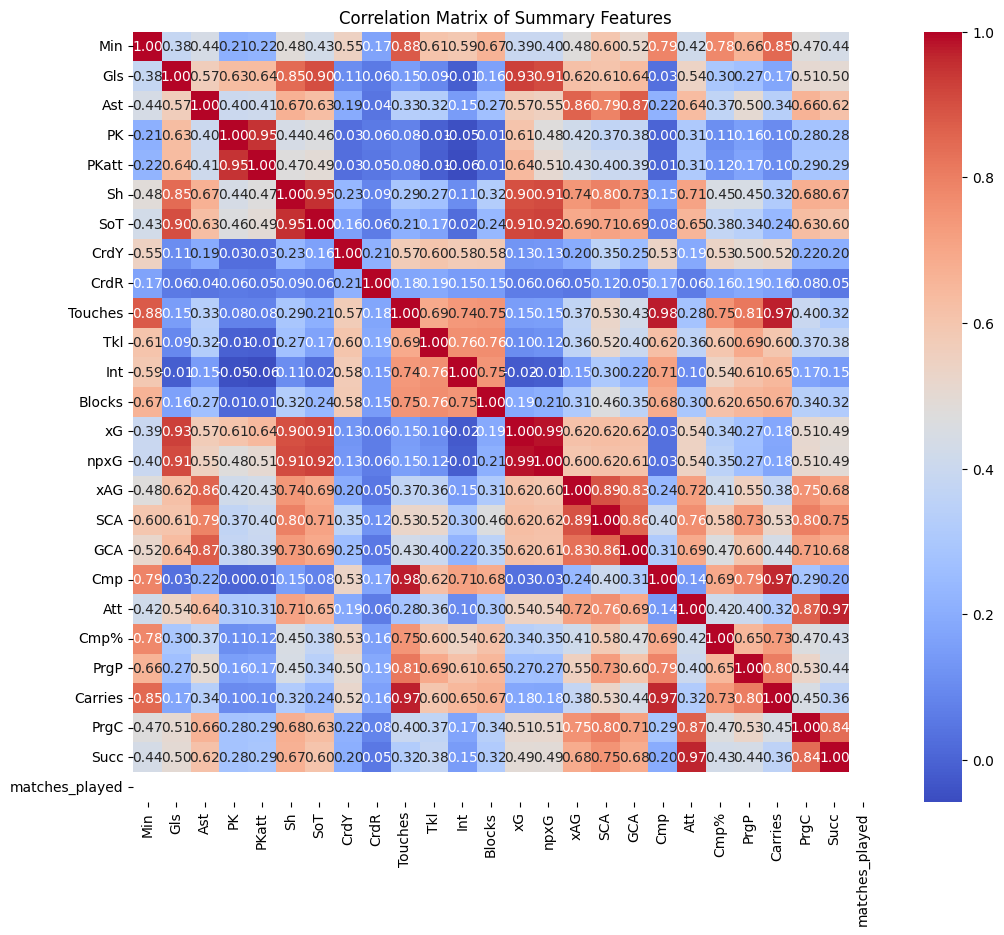

In [123]:
# check correlations for num features and plot
import seaborn as sns
import matplotlib.pyplot as plt
corr = summary_df[num_features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Summary Features")
plt.show()

In [124]:
# sot %%
summary_df['SoT%'] = summary_df['SoT'] / summary_df['Sh'] * 100

In [125]:
# columns to drop based on correlation
cols_to_drop = ['SoT', 'Gls', 'Ast', 'Cmp', 'CrdY', 'CrdR', 'xG','PK','PKatt', 'Touches']

In [126]:
# drop cols to drop
summary_df.drop(cols_to_drop, axis=1, inplace=True)

In [128]:
summary_df.fillna(0, inplace=True)

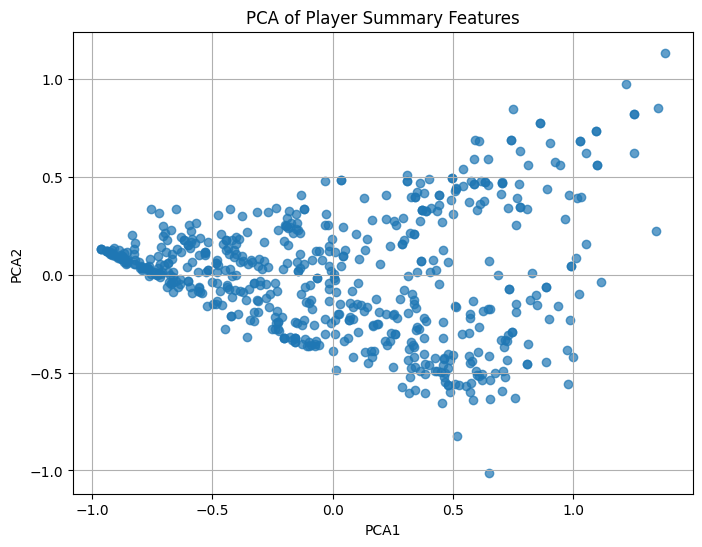

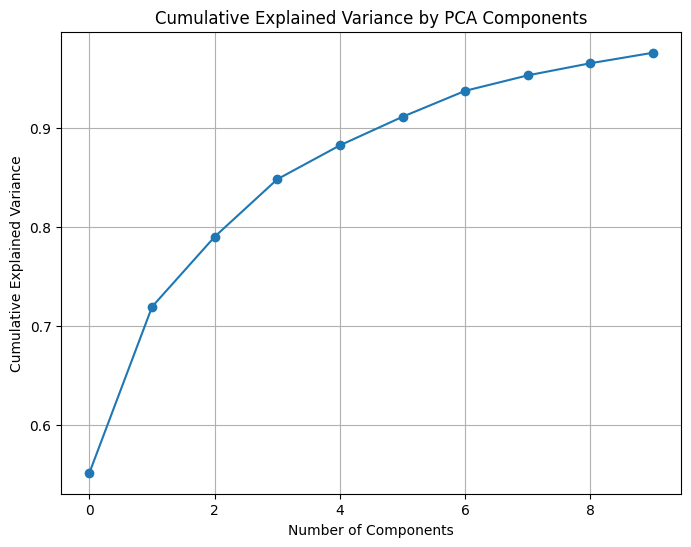

In [129]:
# do a pca analysis on summary df num features
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features= [col for col in summary_df.columns if col not in ['team', 'player']]
scaled_data = scaler.fit_transform(summary_df[num_features])
pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_data)
summary_df['PCA1'] = pca_result[:,0]
summary_df['PCA2'] = pca_result[:,1]
# plot pca1 vs pca2
plt.figure(figsize=(8,6))
plt.scatter(summary_df['PCA1'], summary_df['PCA2'], alpha=0.7)
plt.title("PCA of Player Summary Features")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()
# print explained variance ratio
# plot cumulative explained variance ratio
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [130]:
# optimal number of components is 6+1=7

pca = PCA(n_components=7)
pca_result = pca.fit_transform(scaled_data)
summary_df['PCA1'] = pca_result[:,0]
summary_df['PCA2'] = pca_result[:,1]
summary_df['PCA3'] = pca_result[:,2]
summary_df['PCA4'] = pca_result[:,3]
summary_df['PCA5'] = pca_result[:,4]
summary_df['PCA6'] = pca_result[:,5]
summary_df['PCA7'] = pca_result[:,6]
summary_df.head()
# print sum explained variance ratio
print("Total Explained Variance by 7 components:", sum(pca.explained_variance_ratio_))

Total Explained Variance by 7 components: 0.9375778472493028


In [131]:
summary_df.head()

,team,player,Min,Sh,Tkl,Int,Blocks,npxG,xAG,SCA,...,Succ,matches_played,SoT%,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,Arsenal,Aaron Ramsdale,84.375000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.093750,...,0.000000,1.0,0.000000,-0.202864,-0.324980,-0.282711,0.521860,-0.145971,0.036924,-0.191593
2,Arsenal,Ayden Heaven,15.454545,0.181818,0.363636,0.363636,0.181818,0.009091,0.000000,0.363636,...,0.181818,1.0,0.000000,-0.601415,-0.033087,-0.149131,-0.135627,0.072449,-0.020522,-0.046461
3,Arsenal,Ben White,59.900000,0.450000,1.000000,0.800000,0.500000,0.020000,0.065000,1.150000,...,0.000000,1.0,22.222222,0.168534,-0.258025,-0.002957,-0.014741,0.036560,0.119996,0.014278
5,Arsenal,Bukayo Saka,69.160000,2.640000,1.160000,0.120000,0.880000,0.244000,0.308000,4.680000,...,1.640000,1.0,33.333333,1.219420,0.973380,-0.279193,-0.170504,0.123143,0.202416,-0.033560
6,Arsenal,Christian Nørgaard,82.911765,1.147059,2.323529,1.441176,1.529412,0.126471,0.038235,1.705882,...,0.205882,1.0,38.461538,0.809685,-0.458266,0.218451,-0.167572,0.365914,-0.026168,-0.001283


In [ ]:
# select features, since we only have a training data for season 24-25, we will try to select minimum features to highlight attack, defense, passing, possession
# we will create two matrices, one for attack features, one for defense features
# then we will train two separate models, for home goals and away goals prediction where we input attack features for home team and defense features for away team to predict home goals and vice versa for away goals


In [ ]:
# baseline model with pca features onlyfrom sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [172]:
import pickle
with open('train_set_2425.pkl', 'rb') as f:
    train_set = pickle.load(f)

In [173]:
len(train_set)

380

In [174]:
ydf=None
xdf=None
for match_id, match_info in train_set.items():
    xdf_match = None
    for team_key in ['team1_players', 'team2_players']:
        team_name = match_info['team1'] if team_key == 'team1_players' else match_info['team2']
        team_feats=None
        for player_info in match_info[team_key]:
            player_name = player_info['player_name']
            if team_name in playerinfo and player_name in playerinfo[team_name]:
                pos_weights = playerinfo[team_name][player_name].get('position_weights', {})
            else:
                pos_weights = {}

            # player PCA features
            pca_features = summary_df[(summary_df['team'] == team_name) & (summary_df['player'] == player_name)]
            if pca_features.empty:
                continue
            pca_features = pca_features[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7']].iloc[0].to_dict()
            if team_feats is None:
                team_feats = {}
            team_feats[player_name] = {
                'position_weights': pos_weights,
                'pca_features': pca_features
            }
        if xdf_match is None:
            xdf_match = {}
        xdf_match[team_key] = team_feats
    if xdf is None:
        xdf = {}

    xdf[match_id] = xdf_match
    
    match_result = {
        'match_id': match_id,
        'team1': match_info['team1'],
        'team2': match_info['team2'],
        # 'formation_team1': match_info['formation_team1'],
        # 'formation_team2': match_info['formation_team2'],
        'result_team1': match_info['result'], # convert to 1 if Win, 0 if Draw, -1 if Lose
        'scoreline': match_info['scoreline']
    }
    match_result_df = pd.DataFrame([match_result])
    if ydf is None:
        ydf = match_result_df
    else:
        ydf = pd.concat([ydf, match_result_df], ignore_index=True)


In [175]:
# create a dataframe with just PCA features for each team in each match in xdf
xtrain = None
for match_id, match_info in train_set.items():
    for team_key in ['team1_players', 'team2_players']:
        team_name = match_info['team1'] if team_key == 'team1_players' else match_info['team2']
        for player_info in match_info[team_key]:
            player_name = player_info['player_name']

            # player PCA features
            pca_features = summary_df[(summary_df['team'] == team_name) & (summary_df['player'] == player_name)]
            if pca_features.empty:
                continue
            pca_features = pca_features[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7']]
            pca_features['player_name'] = player_name
            pca_features['team_name'] = team_name
            pca_features['match_id'] = match_id
            if xtrain is None:
                xtrain = pca_features
            else:
                xtrain = pd.concat([xtrain, pca_features], ignore_index=True)


In [140]:
ydf.head()

,match_id,team1,team2,result_team1,scoreline
0,Arsenal_Wolves_1_20240817_H,Arsenal,Wolves,W,2–0
1,Arsenal_Aston Villa_2_20240824_A,Arsenal,Aston Villa,W,2–0
2,Brentford_Southampton_3_20240831_H,Brentford,Southampton,W,3-1
3,Manchester Utd_Southampton_4_20240914_A,Manchester Utd,Southampton,W,3-0
4,Ipswich Town_Southampton_5_20240921_A,Ipswich Town,Southampton,D,1-1


In [141]:
ydf['home_match'] = ydf['match_id'].apply(lambda x: 1 if x.endswith('_H') else 0)

In [230]:
awaymatches = ydf[ydf.home_match == 0.0]
homematches = ydf[ydf.home_match == 1.0]

In [142]:
# flatten xtrain to have one row per match with team1 and team2 pca features
xtrain.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,player_name,team_name,match_id
0,0.168534,-0.258025,-0.002957,-0.014741,0.036560,0.119996,0.014278,Ben White,Arsenal,Arsenal_Wolves_1_20240817_H
1,1.219420,0.973380,-0.279193,-0.170504,0.123143,0.202416,-0.033560,Bukayo Saka,Arsenal,Arsenal_Wolves_1_20240817_H
2,-0.098128,-0.362798,-0.289863,0.585192,-0.193722,0.039448,-0.083642,David Raya,Arsenal,Arsenal_Wolves_1_20240817_H
3,0.830315,0.008400,-0.082664,-0.084396,0.118838,0.326469,0.051253,Declan Rice,Arsenal,Arsenal_Wolves_1_20240817_H
4,-0.017742,0.252378,0.102859,0.051054,0.087101,-0.092282,0.096185,Gabriel Jesus,Arsenal,Arsenal_Wolves_1_20240817_H


In [232]:
# since the order of players in team1_players and team2_players may vary, wee need formation info to align players

In [255]:
teams2425=['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brentford',
 'Brighton',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Ipswich Town',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester Utd',
 'Newcastle Utd',
 "Nott'ham Forest",
 'Southampton',
 'Tottenham',
 'West Ham',
 'Wolves']

In [263]:
train_set.keys()

dict_keys(['Arsenal_Wolves_1_20240817_H', 'Arsenal_Aston Villa_2_20240824_A', 'Brentford_Southampton_3_20240831_H', 'Manchester Utd_Southampton_4_20240914_A', 'Ipswich Town_Southampton_5_20240921_A', 'Bournemouth_Southampton_6_20240930_H', 'Arsenal_Southampton_7_20241005_H', 'Leicester City_Southampton_8_20241019_A', 'Manchester City_Southampton_9_20241026_H', 'Everton_Southampton_10_20241102_A', 'Southampton_Wolves_11_20241109_A', 'Fulham_Southampton_17_20241222_H', 'Southampton_West Ham_18_20241226_H', 'Crystal Palace_Southampton_19_20241229_H', 'Brentford_Southampton_20_20250104_A', 'Manchester Utd_Southampton_21_20250116_H', "Nott'ham Forest_Southampton_22_20250119_H", 'Ipswich Town_Southampton_24_20250201_H', 'Bournemouth_Southampton_25_20250215_A', 'Brighton_Southampton_26_20250222_A', 'Chelsea_Southampton_27_20250225_H', 'Liverpool_Southampton_28_20250308_H', 'Southampton_Wolves_29_20250315_H', 'Crystal Palace_Southampton_30_20250402_A', 'Southampton_Tottenham_31_20250406_A', 'A

In [143]:
# import partial function
from functools import partial
def get_idrow(row, curr):
    teams = [row['Opponent'],curr]
    teams= sorted(teams)
    dates = row['Date']
    if type(dates) == str:
        pass
    else:
        dates = str(dates.date())
    v = row['Venue']
    if teams[0]==curr and v=='Home':
        suffix = f'_{row["Round"].split(" ")[1]}_{dates.replace("-","")}_H'
    elif teams[0]==curr and v=='Away':
        suffix = f'_{row["Round"].split(" ")[1]}_{dates.replace("-","")}_A'
    elif teams[1]==curr and v=='Home':
        suffix = f'_{row["Round"].split(" ")[1]}_{dates.replace("-","")}_A'
    else:
        suffix = f'_{row["Round"].split(" ")[1]}_{dates.replace("-","")}_H'

    return "_".join(teams)+suffix

In [147]:
list(teaminfo.keys())

['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brentford',
 'Brighton',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Ipswich Town',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester Utd',
 'Newcastle Utd',
 "Nott'ham Forest",
 'Southampton',
 'Tottenham',
 'West Ham',
 'Wolves']

In [176]:
all_matches=None
for team in list(teaminfo.keys()):
    print(team)
    matchinfodf = pd.read_csv(glob(f"{teaminfo[team]['path']}/match*csv")[0])
    matchinfodf = matchinfodf[matchinfodf['Comp']=='Premier League']
    func = partial(get_idrow, curr=team)
    matchinfodf['match_id'] = matchinfodf.apply(func, axis=1)
    matchinfodf['Squad']=team
    if all_matches is None:
        all_matches = matchinfodf
    else:
        all_matches = pd.concat([all_matches, matchinfodf], ignore_index=True)

Arsenal
Aston Villa
Bournemouth
Brentford
Brighton
Chelsea
Crystal Palace
Everton
Fulham
Ipswich Town
Leicester City
Liverpool
Manchester City
Manchester Utd
Newcastle Utd
Nott'ham Forest
Southampton
Tottenham
West Ham
Wolves


In [177]:
all_matches = all_matches[all_matches['Venue']=='Home']

In [151]:
def getformationinfo(row):
    team1f=None
    team2f= None # team1, team2
    match_id = row['match_id']
    match_info = all_matches[all_matches['match_id'] == match_id]
    if not match_info.empty:
        if row['team1'] == match_info['Squad'].values[0]:
            team1f = match_info['Formation'].values[0]
            team2f = match_info['Opp Formation'].values[0]
        elif row['team2'] == match_info['Squad'].values[0]:
            team2f = match_info['Formation'].values[0]
            team1f = match_info['Opp Formation'].values[0]
    return team1f, team2f

In [178]:
ydf['team1_formation'], ydf['team2_formation'] = zip(*ydf.apply(lambda row: getformationinfo(row), axis=1))

In [179]:
ydf

,match_id,team1,team2,result_team1,scoreline,team1_formation,team2_formation
0,Arsenal_Wolves_1_20240817_H,Arsenal,Wolves,W,2–0,4-3-3,4-2-3-1
1,Arsenal_Aston Villa_2_20240824_A,Arsenal,Aston Villa,W,2–0,4-3-3,4-4-2
2,Brentford_Southampton_3_20240831_H,Brentford,Southampton,W,3-1,4-3-3,3-5-2
3,Manchester Utd_Southampton_4_20240914_A,Manchester Utd,Southampton,W,3-0,4-2-3-1,4-2-3-1
4,Ipswich Town_Southampton_5_20240921_A,Ipswich Town,Southampton,D,1-1,4-2-3-1,4-2-3-1
...,...,...,...,...,...,...,...
375,Tottenham_Wolves_32_20250413_A,Tottenham,Wolves,L,2-4,4-3-3,3-4-3
376,Nott'ham Forest_West Ham_10_20241102_H,Nott'ham Forest,West Ham,W,3–0,4-2-3-1,3-4-3
377,Nott'ham Forest_Tottenham_18_20241226_H,Nott'ham Forest,Tottenham,W,1–0,4-2-3-1,4-2-3-1
378,Nott'ham Forest_Tottenham_33_20250421_A,Nott'ham Forest,Tottenham,W,2–1,4-2-2-2,4-3-3


In [180]:
xtrain.drop_duplicates(inplace=True)

In [181]:
xtrain.shape

(11561, 10)

In [182]:
# getting player positions for each match in xtrain
new_train = []
for index, row in xtrain.iterrows():
    match_id = row['match_id']
    team_name = row['team_name']
    player = row['player_name']
    summdf = pd.read_json(playerinfo[team_name][player]['summary'])
    infos = match_id.split('_')
    if infos[0] == team_name:
        oppteam = infos[1]
        matchday = infos[2]
    else:
        oppteam = infos[0]
        matchday = infos[2]
    match_info = summdf[(summdf['Round'] == f'Matchweek {int(matchday)}') & (summdf['Opponent'] == oppteam)]
    row['Pos'] = match_info['Pos'].values[0] if not match_info.empty else None
    row['Minutes'] = match_info['Min'].values[0] if not match_info.empty else None
    row['Starts'] = match_info['Start'].values[0] if not match_info.empty else None
    # convert start Y/N to 1/0
    if row['Starts'] == 'Y':
        row['Starts'] = 1
    elif row['Starts'] == 'N':
        row['Starts'] = 0
    new_train.append(row)

In [183]:
xtrain = pd.DataFrame(new_train)

In [184]:
xtrain['Starts'].unique()

# replace Y* with 1

xtrain['Starts'].replace({'Y*': 1, 'N': 0}, inplace=True)

/tmp/ipykernel_1032/3919250138.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtrain['Starts'].replace({'Y*': 1, 'N': 0}, inplace=True)
/tmp/ipykernel_1032/3919250138.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xtrain['Starts'].replace({'Y*': 1, 'N': 0}, inplace=True)


In [185]:
xtrain['Starts'].unique()

array([1, 0])

In [186]:
xtrain[xtrain['Starts']==1]['match_id'].value_counts()

match_id
Tottenham_West Ham_8_20241019_H            22
Arsenal_Wolves_1_20240817_H                22
Arsenal_Aston Villa_2_20240824_A           22
Brentford_Southampton_3_20240831_H         22
Manchester Utd_Southampton_4_20240914_A    22
                                           ..
Arsenal_Southampton_38_20250525_A          22
Arsenal_Tottenham_4_20240915_A             22
Arsenal_Manchester Utd_14_20241204_H       22
Arsenal_Fulham_15_20241208_A               22
Manchester Utd_Tottenham_25_20250216_A     22
Name: count, Length: 380, dtype: int64

In [164]:
xtrain[(xtrain['Starts']==1)&(xtrain['match_id']=='Fulham_Tottenham_29_20250316_H')&(xtrain['team_name']=='Fulham')]

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,player_name,team_name,match_id,Pos,Minutes,Starts
12342,0.477687,-0.562946,0.031240,0.139547,0.056386,0.121842,-0.083762,Joachim Andersen,Fulham,Fulham_Tottenham_29_20250316_H,CB,90,1
12344,1.014462,0.391746,-0.095407,-0.101722,-0.098819,0.305012,-0.069949,Alex Iwobi,Fulham,Fulham_Tottenham_29_20250316_H,RW,62,1
12345,0.297876,0.177631,-0.132987,0.023307,0.119578,0.226838,0.053727,Andreas Pereira,Fulham,Fulham_Tottenham_29_20250316_H,DM,90,1
12346,0.998438,-0.418541,-0.175343,-0.466101,-0.084616,-0.081016,-0.198093,Antonee Robinson,Fulham,Fulham_Tottenham_29_20250316_H,LB,90,1
12347,-0.073222,-0.362976,-0.289327,0.612278,-0.213283,0.025239,-0.032611,Bernd Leno,Fulham,Fulham_Tottenham_29_20250316_H,GK,90,1
12348,0.478596,-0.476542,0.030957,0.141170,-0.157252,0.018261,-0.042068,Calvin Bassey,Fulham,Fulham_Tottenham_29_20250316_H,CB,90,1
12349,0.478759,0.066458,-0.018256,0.087480,0.019972,0.143416,0.217257,Emile Smith Rowe,Fulham,Fulham_Tottenham_29_20250316_H,AM,71,1
12351,0.434177,0.326868,0.007403,0.257306,0.303773,-0.155431,0.070078,Raúl Jiménez,Fulham,Fulham_Tottenham_29_20250316_H,FW,62,1
12354,0.426210,-0.427645,0.101759,-0.014738,-0.134064,0.073787,0.122400,Sander Berge,Fulham,Fulham_Tottenham_29_20250316_H,DM,90,1
12355,0.012047,-0.233578,0.178394,-0.069430,-0.012444,0.017708,-0.023091,Timothy Castagne,Fulham,Fulham_Tottenham_29_20250316_H,RB,90,1


In [187]:
# save files before training
# save playerinfo, ydf, xtrain
with open('playerinfo_final.json', 'w') as f:
    json.dump(playerinfo, f, indent=4)
ydf.to_csv('matchinfo_train2425.csv', index=False)
xtrain.to_csv('player_pca_features_final_2425.csv', index=False)

In [349]:
xtrain.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,player_name,team_name,match_id,Pos,Minutes,Starts
0,0.186637,0.279652,-0.002643,-0.013538,0.034970,0.120054,0.015690,Ben White,Arsenal,Arsenal_Wolves_1_20240817_H,RB,90,1
1,1.316563,-1.088237,-0.285330,-0.174154,0.127942,0.208751,-0.024156,Bukayo Saka,Arsenal,Arsenal_Wolves_1_20240817_H,RW,79,1
2,-0.104011,0.392363,-0.284598,0.588194,-0.196484,0.038539,-0.079677,David Raya,Arsenal,Arsenal_Wolves_1_20240817_H,GK,90,1
3,0.903643,-0.019862,-0.085125,-0.083433,0.114890,0.328433,0.057833,Declan Rice,Arsenal,Arsenal_Wolves_1_20240817_H,LM,84,1
4,-0.020187,-0.282167,0.107954,0.047930,0.086602,-0.090067,0.094006,Gabriel Jesus,Arsenal,Arsenal_Wolves_1_20240817_H,FW,6,0


In [188]:
# get a union of all formations
formations = list(set(pd.Series(pd.concat([ydf['team1_formation'], ydf['team2_formation']]).unique()).values))

In [189]:
ydf[ydf['team1_formation'] == '3-4-3']

,match_id,team1,team2,result_team1,scoreline,team1_formation,team2_formation
13,Crystal Palace_Southampton_19_20241229_H,Crystal Palace,Southampton,W,2-1,3-4-3,3-4-3
15,Manchester Utd_Southampton_21_20250116_H,Manchester Utd,Southampton,W,3-1,3-4-3,3-4-1-2
22,Southampton_Wolves_29_20250315_H,Southampton,Wolves,L,1–2,3-4-3,3-4-3
23,Crystal Palace_Southampton_30_20250402_A,Crystal Palace,Southampton,D,1-1,3-4-3,3-4-3
26,Southampton_West Ham_33_20250419_A,Southampton,West Ham,D,1–1,3-4-3,4-2-3-1
35,Manchester Utd_Tottenham_25_20250216_A,Manchester Utd,Tottenham,L,0–1,3-4-3,4-3-3
37,Ipswich Town_Manchester Utd_27_20250226_A,Ipswich Town,Manchester Utd,L,2-3,3-4-3,3-4-3
39,Leicester City_Manchester Utd_29_20250316_H,Leicester City,Manchester Utd,L,0-3,3-4-3,3-4-3
40,Manchester Utd_Newcastle Utd_32_20250413_A,Manchester Utd,Newcastle Utd,L,1–4,3-4-3,4-3-3
76,Brentford_Newcastle Utd_15_20241207_H,Brentford,Newcastle Utd,W,4–2,3-4-3,4-3-3


In [190]:
xtrain['Starts']

0        1
1        1
2        1
3        1
4        0
        ..
13062    0
13063    1
13064    1
13065    1
13067    1
Name: Starts, Length: 11561, dtype: int64

In [371]:
xtrain[(xtrain['match_id']=='Crystal Palace_Southampton_19_20241229_H')&(xtrain['team_name']=='Crystal Palace')&(xtrain['Starts']==1)]['Pos'].value_counts()

Pos
CB    3
AM    2
WB    2
CM    2
GK    1
FW    1
Name: count, dtype: int64

In [380]:
ydf

,match_id,team1,team2,result_team1,scoreline,home_match,team1_formation,team2_formation
0,Arsenal_Wolves_1_20240817_H,Arsenal,Wolves,W,2–0,1,4-3-3,4-2-3-1
1,Arsenal_Aston Villa_2_20240824_A,Arsenal,Aston Villa,W,2–0,0,4-3-3,4-4-2
2,Brentford_Southampton_3_20240831_H,Brentford,Southampton,W,3-1,1,4-3-3,3-5-2
3,Manchester Utd_Southampton_4_20240914_A,Manchester Utd,Southampton,W,3-0,0,4-2-3-1,4-2-3-1
4,Ipswich Town_Southampton_5_20240921_A,Ipswich Town,Southampton,D,1-1,0,4-2-3-1,4-2-3-1
...,...,...,...,...,...,...,...,...
375,Tottenham_Wolves_32_20250413_A,Tottenham,Wolves,L,2-4,0,4-3-3,3-4-3
376,Nott'ham Forest_West Ham_10_20241102_H,Nott'ham Forest,West Ham,W,3–0,1,4-2-3-1,3-4-3
377,Nott'ham Forest_Tottenham_18_20241226_H,Nott'ham Forest,Tottenham,W,1–0,1,4-2-3-1,4-2-3-1
378,Nott'ham Forest_Tottenham_33_20250421_A,Nott'ham Forest,Tottenham,W,2–1,0,4-2-2-2,4-3-3


In [381]:
# check formations where WB is used so we can update WB with LWB/RWB
wb_teams = xtrain[xtrain['Pos']=='WB'][['team_name','match_id']].drop_duplicates()

In [385]:
wb_teams['team1'] = wb_teams.apply(lambda row: row['match_id'].split("_")[0], axis=1)
wb_teams['team2'] = wb_teams.apply(lambda row: row['match_id'].split("_")[1], axis=1)

In [387]:
wb_teams['is_team1'] = wb_teams.apply(lambda row: 1 if row['team_name']==row['team1'] else 0, axis=1)

In [395]:
forms_w_wb=list(set(ydf[ydf.match_id.isin(wb_teams[wb_teams['is_team1'].astype(bool)]['match_id'])]['team1_formation'].unique()).union(set(ydf[ydf.match_id.isin(wb_teams[~wb_teams['is_team1'].astype(bool)]['match_id'])]['team2_formation'].unique())).union(set(ydf[ydf.match_id.isin(wb_teams[~(wb_teams['is_team1'].astype(bool))]['match_id'])]['team2_formation'].unique())))

In [416]:
xtrain[xtrain['Pos']=='WB']

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,player_name,team_name,match_id,Pos,Minutes,Starts,new_POS
427,-0.378083,0.080147,0.053523,-0.020710,-0.029502,0.043795,-0.049459,James Bree,Southampton,Fulham_Southampton_17_20241222_H,WB,11,0,RWB
430,0.796893,0.072385,-0.125887,-0.046651,-0.357664,0.073079,-0.101023,Kyle Walker-Peters,Southampton,Fulham_Southampton_17_20241222_H,WB,90,1,RWB
437,-0.011552,0.075959,0.119017,-0.025139,-0.076704,0.065887,0.028089,Yukinari Sugawara,Southampton,Fulham_Southampton_17_20241222_H,WB,79,1,RWB
448,-0.378083,0.080147,0.053523,-0.020710,-0.029502,0.043795,-0.049459,James Bree,Southampton,Southampton_West Ham_18_20241226_H,WB,30,0,RWB
452,0.796893,0.072385,-0.125887,-0.046651,-0.357664,0.073079,-0.101023,Kyle Walker-Peters,Southampton,Southampton_West Ham_18_20241226_H,WB,85,1,RWB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777,1.078779,-0.063400,-0.147878,-0.279862,-0.212110,-0.172699,-0.115958,Rayan Aït-Nouri,Wolves,Manchester City_Wolves_35_20250502_H,WB,90,1,LWB
12790,-0.403538,-0.077139,0.225115,-0.060878,-0.062361,0.018914,-0.002033,Rodrigo Gomes,Wolves,Manchester City_Wolves_35_20250502_H,WB,25,0,LWB
12841,1.078779,-0.063400,-0.147878,-0.279862,-0.212110,-0.172699,-0.115958,Rayan Aït-Nouri,Wolves,Tottenham_Wolves_32_20250413_A,WB,69,1,LWB
12851,0.716333,0.180463,0.040085,-0.056314,-0.214064,-0.096622,-0.121347,Nélson Semedo,Wolves,Tottenham_Wolves_32_20250413_A,WB,90,1,RWB


In [419]:
playerinfo['Southampton']['Yukinari Sugawara']['position_weights']

{'RB': 0.5198079231692677,
 'RM': 0.11644657863145258,
 'AM': 0.0006002400960384153,
 'FW': 0.0006002400960384153,
 'RW': 0.010804321728691477,
 'RWB': 0.3517406962785114}

In [191]:
# we need to resolve two data problems
mpos = {4: [0.5,0.25,0.15,0.1], 3:[0.5,0.3,0.2], 2:[0.7,0.3]}
# replacing WB with LWB/RWB based on formation and player affinity as in position_weights
def resolve_WB_positions(row):
    pos = row['Pos']
    if 'WB' not in pos:
        return pos  # no need to resolve
    
    match_id = row['match_id']
    team_name = row['team_name']
    player_name = row['player_name']
    starts = row['Starts']
    if starts != 1:
        return pos  # only resolve for starting players #TODO

    # check if multiple positions assigned to player
    if ',' in pos:
        pos_list = [p.strip() for p in pos.split(',')]
    else:
        pos_list = [pos]

    
    if len(pos_list) == 1:
        la = 0
        ra = 0

        position_weights = playerinfo[team_name][player_name].get('position_weights', {})

        for k,v in position_weights.items():
            if 'L' in k:
                la += v
            elif 'R' in k:
                ra += v
        # normalize to sum to 1
        total = la + ra
        la = la/total if total > 0 else 0
        ra = ra/total if total > 0 else 0
        # check if there is another WB for this match
        wb_matches = xtrain[(xtrain['match_id']==match_id) & (xtrain['team_name']==team_name) & (xtrain['Pos']=='WB')&(xtrain['Starts']==1)]
        if len(wb_matches) > 1:
            all_players = wb_matches['player_name'].tolist()
            if len(all_players) > 2:
                raise(ValueError("More than two starting WB players found for the same match"))
            other_player = all_players[0] if all_players[1]==player_name else all_players[1]
            other_position_weights = playerinfo[team_name][other_player].get('position_weights', {})
            ola = 0
            ora = 0
            replace_pos = None
            for k,v in other_position_weights.items():
                if 'L' in k:
                    ola += v
                elif 'R' in k:
                    ora += v

            total_o = ola + ora
            ola = ola/total_o if total_o > 0 else 0
            ora = ora/total_o if total_o > 0 else 0
            if ola > la:
                replace_pos = 'RWB'
            elif ora > ra:
                replace_pos = 'LWB'
            
            if replace_pos is None:
                print(la,ra,ola,ora)

            return replace_pos
        
        if la > ra:
            replace_pos= 'LWB'
        else:
            replace_pos= 'RWB'
        return replace_pos
    
    else:
        
        la = 0
        ra = 0
        for idx,p in enumerate(pos_list):
            if p=='WB':
                continue
            v = mpos[len(pos_list)][idx]
            if 'L' in p:
                la += v
            elif 'R' in p:
                ra += v
        if la > ra:
            replace_pos= 'LWB'
        else:
            replace_pos= 'RWB'
        
    return pos.replace('WB', replace_pos)

# cannot resolve

# other problem is players with multiple positions, we will get coordinates of player using weights which can be used in formation to position mapping



In [192]:
xtrain['new_POS'] = xtrain.apply(lambda row: resolve_WB_positions(row), axis=1)

In [195]:
def resolve_WB_subs(row):
    pos = row['new_POS']
    if type(pos) != type(""):
        print(pos)
        pos = row['Pos']
        print('replaced',pos)
    if 'WB' not in pos.split(','):
        return pos  # no need to resolve
    
    match_id = row['match_id']
    team_name = row['team_name']
    player_name = row['player_name']
    starts = row['Starts']
    if starts == 1:
        raise(ValueError("This function is only for substitutes"))
        return pos  

    # check if multiple positions assigned to player
    if ',' in pos:
        pos_list = [p.strip() for p in pos.split(',')]
    else:
        pos_list = [pos]

    
    if len(pos_list) == 1:
        la = 0
        ra = 0

        position_weights = playerinfo[team_name][player_name].get('position_weights', {})

        for k,v in position_weights.items():
            if 'L' in k:
                la += v
            elif 'R' in k:
                ra += v
        # normalize to sum to 1
        total = la + ra
        la = la/total if total > 0 else 0
        ra = ra/total if total > 0 else 0

        # other subbed in players for this match
        subbed_players = xtrain[(xtrain['match_id']==match_id) & (xtrain['team_name']==team_name) &(xtrain['Starts']==0)&(xtrain['Pos']=='WB')]
        if len(subbed_players) > 1:
            all_players = subbed_players['player_name'].tolist()
            if len(all_players) > 2:
                raise(ValueError("More than two starting WB players found for the same match"))
            other_player = all_players[0] if all_players[1]==player_name else all_players[1]
            other_position_weights = playerinfo[team_name][other_player].get('position_weights', {})
            ola = 0
            ora = 0
            replace_pos = None
            for k,v in other_position_weights.items():
                if 'L' in k:
                    ola += v
                elif 'R' in k:
                    ora += v

            total_o = ola + ora
            ola = ola/total_o if total_o > 0 else 0
            ora = ora/total_o if total_o > 0 else 0
            if ola > la:
                replace_pos = 'RWB'
            elif ora > ra:
                replace_pos = 'LWB'
            
            if replace_pos is None:
                # check for subbed out players for this match
                sub_mins = 90-int(row['Minutes'])
                subbed_out_players = xtrain[(xtrain['match_id']==match_id) & (xtrain['team_name']==team_name) &(xtrain['Starts']==1)&(xtrain['Pos']=='WB')&(xtrain['Minutes']==str(sub_mins))]
                if len(subbed_out_players) > 0:
                    all_out_players = subbed_out_players['player_name'].tolist()
                    if len(all_out_players) > 1:
                        raise(ValueError("More than one subbed out WB players found for the same match"))
                    out_player = all_out_players[0]
                    out_player_pos = subbed_out_players['new_POS'].values[0]

                    return out_player_pos
                print(la,ra,ola,ora)        

        if la > ra:
            replace_pos= 'LWB'
        else:
            replace_pos= 'RWB'
        return replace_pos
    
    else:
        
        la = 0
        ra = 0
        for idx,p in enumerate(pos_list):
            if p=='WB':
                continue
            v = mpos[len(pos_list)][idx]
            if 'L' in p:
                la += v
            elif 'R' in p:
                ra += v
        if la > ra:
            replace_pos= 'LWB'
        else:
            replace_pos= 'RWB'
        
    return pos.replace('WB', replace_pos)

In [198]:
xtrain['new_POS'] = xtrain.apply(lambda row: resolve_WB_subs(row), axis=1)

In [ ]:


xtrain.to_csv('player_pca_features_final_2425.csv', index=False)

# read xtrain, ydf from saved files

# ydf = pd.read_csv('matchinfo_train2425.csv')
# xtrain = pd.read_csv('player_pca_features_final_2425.csv')

In [38]:
xtrain.drop_duplicates(inplace=True)
xtrain.dropna(inplace=True)

In [452]:
xtrain[(xtrain['match_id'] == 'Newcastle Utd_Southampton_1_20240817_H')&(xtrain['team_name']=='Southampton')&(xtrain['Starts']==0)]

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,player_name,team_name,match_id,Pos,Minutes,Starts,new_POS
11170,0.422427,-0.363471,0.110186,-0.001513,0.107779,0.134609,0.125646,Carlos Alcaraz,Southampton,Newcastle Utd_Southampton_1_20240817_H,CM,10,0,CM
11171,0.366155,-0.235980,-0.046483,-0.049394,-0.311958,-0.199237,0.029867,Tyler Dibling,Southampton,Newcastle Utd_Southampton_1_20240817_H,CM,21,0,CM
11175,-0.200606,-0.173647,0.123581,0.236377,-0.084128,-0.154755,0.164433,Cameron Archer,Southampton,Newcastle Utd_Southampton_1_20240817_H,FW,21,0,FW
11182,-0.901334,-0.140316,-0.152831,-0.119051,0.051714,0.005910,-0.027519,Samuel Amo-Ameyaw,Southampton,Newcastle Utd_Southampton_1_20240817_H,WB,10,0,WB
11183,0.008144,-0.132879,-0.327019,-0.262951,-0.380588,-0.025097,0.153547,Samuel Edozie,Southampton,Newcastle Utd_Southampton_1_20240817_H,WB,45,0,WB


In [453]:
xtrain[(xtrain['match_id'] == 'Newcastle Utd_Southampton_1_20240817_H')&(xtrain['team_name']=='Southampton')&(xtrain['Starts']==1)]

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,player_name,team_name,match_id,Pos,Minutes,Starts,new_POS
11172,-0.015266,-0.139355,0.013987,0.223930,0.009684,-0.036144,0.080804,Adam Armstrong,Southampton,Newcastle Utd_Southampton_1_20240817_H,FW,90,1,FW
11173,-0.932941,-0.073293,-0.159540,-0.055544,0.076708,0.039624,-0.149142,Alex McCarthy,Southampton,Newcastle Utd_Southampton_1_20240817_H,GK,90,1,GK
11174,-0.411769,-0.105704,-0.118917,0.139356,0.039433,-0.020555,0.064615,Ben Brereton,Southampton,Newcastle Utd_Southampton_1_20240817_H,FW,69,1,FW
11177,0.441815,0.503672,0.106955,-0.047022,-0.017779,-0.110087,-0.004963,Flynn Downes,Southampton,Newcastle Utd_Southampton_1_20240817_H,"CM,CB",90,1,"CM,CB"
11178,0.181268,0.426042,0.310252,0.031608,-0.068587,0.051245,-0.017570,Jack Stephens,Southampton,Newcastle Utd_Southampton_1_20240817_H,CB,90,1,CB
11179,0.573806,0.900677,0.291844,0.044482,0.062236,-0.152371,-0.060072,Jan Bednarek,Southampton,Newcastle Utd_Southampton_1_20240817_H,CB,80,1,CB
11180,0.201518,0.131102,0.174148,-0.018977,-0.107336,-0.091807,0.028861,Joe Aribo,Southampton,Newcastle Utd_Southampton_1_20240817_H,CM,69,1,CM
11181,0.796893,0.072385,-0.125887,-0.046651,-0.357664,0.073079,-0.101023,Kyle Walker-Peters,Southampton,Newcastle Utd_Southampton_1_20240817_H,WB,80,1,LWB
11184,0.633757,0.603032,0.199495,0.153783,0.038060,0.079457,-0.033671,Taylor Harwood-Bellis,Southampton,Newcastle Utd_Southampton_1_20240817_H,CB,90,1,CB
11186,-0.250330,0.087823,-0.036463,0.000202,-0.017429,-0.029830,0.158093,William Smallbone,Southampton,Newcastle Utd_Southampton_1_20240817_H,CM,90,1,CM


In [410]:
xtrain[(xtrain['match_id'] == "Arsenal_Wolves_1_20240817_H")&(xtrain['team_name']=='Wolves')&(xtrain['Starts'])]

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,player_name,team_name,match_id,Pos,Minutes,Starts
15,1.078779,-0.063400,-0.147878,-0.279862,-0.212110,-0.172699,-0.115958,Rayan Aït-Nouri,Wolves,Arsenal_Wolves_1_20240817_H,LB,83,1
19,-0.436137,-0.118822,0.395512,0.090073,-0.151289,0.004616,0.069520,Hwang Hee-chan,Wolves,Arsenal_Wolves_1_20240817_H,"RW,RM,FW,LM",90,1
20,0.144753,-0.143432,-0.068488,-0.081370,-0.068400,0.017309,0.050064,Jean-Ricner Bellegarde,Wolves,Arsenal_Wolves_1_20240817_H,AM,56,1
21,-0.252684,0.264492,-0.284063,0.456108,-0.163970,-0.002636,-0.175785,José Sá,Wolves,Arsenal_Wolves_1_20240817_H,GK,90,1
22,0.887046,0.382030,-0.057302,-0.250870,0.012825,-0.153861,0.030574,João Gomes,Wolves,Arsenal_Wolves_1_20240817_H,"DM,CM",83,1
23,0.277496,-0.309438,0.299200,0.463203,0.226440,-0.059194,-0.083111,Jørgen Strand Larsen,Wolves,Arsenal_Wolves_1_20240817_H,FW,83,1
24,0.791883,0.472984,0.089524,-0.246998,0.238159,-0.182879,-0.012247,Mario Lemina,Wolves,Arsenal_Wolves_1_20240817_H,"DM,CM",90,1
25,0.079413,0.253463,0.080995,-0.003352,-0.038373,0.021815,-0.061084,Matt Doherty,Wolves,Arsenal_Wolves_1_20240817_H,RB,90,1
28,-0.403538,-0.077139,0.225115,-0.060878,-0.062361,0.018914,-0.002033,Rodrigo Gomes,Wolves,Arsenal_Wolves_1_20240817_H,"LW,LM",74,1
29,0.513481,0.547801,0.042206,0.020585,-0.155349,-0.065232,-0.081639,Toti Gomes,Wolves,Arsenal_Wolves_1_20240817_H,"CB,LB",90,1


In [409]:
xtrain[(xtrain['match_id'] == "Tottenham_West Ham_8_20241019_H")&(xtrain['team_name']=='West Ham')&(~xtrain['Starts'])]

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,player_name,team_name,match_id,Pos,Minutes,Starts
12974,-0.004393,-0.024194,0.091483,0.103313,-0.014244,0.014552,0.190599,Carlos Soler,West Ham,Tottenham_West Ham_8_20241019_H,CM,30,0
12975,0.043704,-0.273234,-0.014470,-0.003533,-0.137223,-0.098138,0.095233,Crysencio Summerville,West Ham,Tottenham_West Ham_8_20241019_H,"AM,LM",30,0
12976,0.262128,0.365514,-0.119733,-0.089293,-0.065928,-0.075012,0.108138,Edson Álvarez,West Ham,Tottenham_West Ham_8_20241019_H,CM,30,0
12981,0.153112,0.428343,0.120965,0.032874,0.014306,-0.110379,0.040457,Konstantinos Mavropanos,West Ham,Tottenham_West Ham_8_20241019_H,CB,20,0


In [200]:
# add formations to xtrain
def get_team_formation(row):
    match_id = row['match_id']
    team_name = row['team_name']
    match_info = ydf[ydf['match_id'] == match_id]
    if not match_info.empty:
        if team_name == match_info['team1'].values[0]:
            return match_info['team1_formation'].values[0]
        elif team_name == match_info['team2'].values[0]:
            return match_info['team2_formation'].values[0]
    return None

xtrain['formation'] = xtrain.apply(lambda row: get_team_formation(row), axis=1)

In [48]:
sum( [0.4,0.25,0.15,0.12,0.08 ])

1.0

In [201]:
# get coordinates for each position

mpos = {5: [0.4,0.25,0.15,0.12,0.08 ], 4: [0.5,0.25,0.15,0.1], 3:[0.5,0.3,0.2], 2:[0.7,0.3]}

def get_pos_coords(row):
    pos = row['new_POS']

    if ',' in pos:
        pos_list = [p.strip() for p in pos.split(',')]
    else:
        pos_list = [pos]

    if pos == 'GK':
        return (0.0, 0.0)  # GK no weights 
    
    xcoords = 0.0
    ycoords = 0.0
    if len(pos_list) == 1:
        p = pos_list[0]
        if p not in coords:
            print(p)
            return (0.0, 0.0)
        xcoords = coords[p][0]
        ycoords = coords[p][1]
        return (xcoords, ycoords)
    for idx,p in enumerate(pos_list):
        if p not in coords:
            print(p)
            continue
        v = mpos[len(pos_list)][idx]
        xcoords = coords[p][0] * v + xcoords
        ycoords = coords[p][1] * v + ycoords
    return xcoords, ycoords

In [202]:
xtrain['x_coords'] = xtrain.apply(lambda row: get_pos_coords(row)[0], axis=1)
xtrain['y_coords'] = xtrain.apply(lambda row: get_pos_coords(row)[1], axis=1)

In [203]:
# role familiriaty

def get_role_familiarity(row):
    pos = row['new_POS']
    team_name = row['team_name']
    player_name = row['player_name']
    position_weights = playerinfo[team_name][player_name].get('position_weights', {})

    if ',' in pos:
        pos_list = [p.strip() for p in pos.split(',')]
    else:
        pos_list = [pos]

    familiarity = 0.0
    for p in pos_list:
        familiarity += position_weights.get(p, 0.0)
    return familiarity

In [204]:
xtrain['familiarity'] = xtrain.apply(lambda row: get_role_familiarity(row), axis=1)

In [205]:
formations_positions = {
    "4-5-1": ["GK", "RB", "CB", "CB", "LB", "RM", "CM", "CM", "CM", "LM", "FW"],
    "5-4-1": ["GK", "RB", "CB", "CB", "CB", "LB", "RM", "CM", "CM", "LM", "FW"],
    "3-2-4-1": ["GK", "CB", "CB", "CB", "DM", "DM", "RM", "CM", "CM", "LM", "FW"],
    "4-1-4-1": ["GK", "RB", "CB", "CB", "LB", "DM", "RM", "CM", "CM", "LM", "FW"],
    "4-2-3-1": ["GK", "RB", "CB", "CB", "LB", "DM", "DM", "RM", "AM", "LM", "FW"],
    "3-1-4-2": ["GK", "CB", "CB", "CB", "DM", "RM", "CM", "CM", "LM", "FW", "FW"],
    "5-3-2": ["GK", "RB", "CB", "CB", "CB", "LB", "CM", "CM", "CM", "FW", "FW"],
    "4-3-1-2": ["GK", "RB", "CB", "CB", "LB", "CM", "CM", "CM", "AM", "FW", "FW"],
    "4-4-1-1": ["GK", "RB", "CB", "CB", "LB", "RM", "CM", "CM", "LM", "AM", "FW"],
    "4-1-2-1-2": ["GK", "RB", "CB", "CB", "LB", "DM", "CM", "CM", "AM", "FW", "FW"],
    "3-5-2": ["GK", "CB", "CB", "CB", "RWB", "CM", "CM", "CM", "LWB", "FW", "FW"],
    "4-3-3": ["GK", "RB", "CB", "CB", "LB", "CM", "CM", "CM", "RW", "FW", "LW"],
    "4-2-2-2": ["GK", "RB", "CB", "CB", "LB", "DM", "DM", "RM", "LM", "FW", "FW"],
    "4-4-2": ["GK", "RB", "CB", "CB", "LB", "RM", "CM", "CM", "LM", "FW", "FW"],
    "3-4-3": ["GK", "CB", "CB", "CB", "RM", "CM", "CM", "LM", "RW", "FW", "LW"],
    "3-4-1-2": ["GK", "CB", "CB", "CB", "RM", "CM", "CM", "LM", "AM", "FW", "FW"]
}

In [211]:
xdf = []

# order each player in xtrain according to formation positions and append features to xdf for each match and team

for match_id, match_info in xtrain.groupby('match_id'):
    for team_name, team_info in match_info.groupby('team_name'):
        formation = team_info['formation'].values[0]
        if formation not in formations_positions:
            print(f"Formation {formation} not found for team {team_name} in match {match_id}")
            continue
        formation_positions = formations_positions[formation]
        team_players = team_info.copy()
        team_players_start = team_players[team_players['Starts']==1]
        if len(team_players_start) < len(formation_positions):
            print(f"Not enough starting players for team {team_name} in match {match_id}")
            continue
        team_players = team_players_start
        for idx, pos in enumerate(formation_positions):
            # find player closest to position pos
            pos_coord = coords.get(pos, None)
            if pos_coord is None:
                if pos == 'GK':
                    # add GK row to xdf
                    gk_player = team_players[team_players['Pos']=='GK']
                    if gk_player.empty:
                        print(f"No GK found for team {team_name} in match {match_id}")
                        continue
                    selected_player = gk_player.iloc[0]
                    row_data = {
                        'match_id': match_id,
                        'team_name': team_name,
                        'position': pos,
                        'player_name': selected_player['player_name'],
                        'PCA1': selected_player['PCA1'],
                        'PCA2': selected_player['PCA2'],
                        'PCA3': selected_player['PCA3'],
                        'PCA4': selected_player['PCA4'],
                        'PCA5': selected_player['PCA5'],
                        'PCA6': selected_player['PCA6'],
                        'PCA7': selected_player['PCA7'],
                        'x_coords': selected_player['x_coords'],
                        'y_coords': selected_player['y_coords'],
                        'familiarity': selected_player['familiarity'],
                        'order': idx
                    }
                    xdf.append(row_data)
                    # remove selected player from team_players to avoid duplicate selection
                    team_players = team_players[team_players['player_name'] != selected_player['player_name']]
                continue
            px, py = pos_coord
            team_players['dist_to_pos'] = team_players.apply(lambda row: np.sqrt((row['x_coords'] - px)**2 + (row['y_coords'] - py)**2), axis=1)
            team_players_sorted = team_players.sort_values(by=['dist_to_pos', 'player_name'])
            if team_players_sorted.empty:
                print(f"No players found for team {team_name} in match {match_id}")
                continue
            selected_player = team_players_sorted.iloc[0]
            row_data = {
                'match_id': match_id,
                'team_name': team_name,
                'position': pos,
                'player_name': selected_player['player_name'],
                'PCA1': selected_player['PCA1'],
                'PCA2': selected_player['PCA2'],
                'PCA3': selected_player['PCA3'],
                'PCA4': selected_player['PCA4'],
                'PCA5': selected_player['PCA5'],
                'PCA6': selected_player['PCA6'],
                'PCA7': selected_player['PCA7'],
                'x_coords': selected_player['x_coords'],
                'y_coords': selected_player['y_coords'],
                'familiarity': selected_player['familiarity'],
                'order': idx
            }
            xdf.append(row_data)
            # remove selected player from team_players to avoid duplicate selection
            team_players = team_players[team_players['player_name'] != selected_player['player_name']]
        # to get position index, calculate distance of coordinates from position coordinates, sort by distance, name of player

        

/tmp/ipykernel_1032/2211986981.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_players['dist_to_pos'] = team_players.apply(lambda row: np.sqrt((row['x_coords'] - px)**2 + (row['y_coords'] - py)**2), axis=1)
/tmp/ipykernel_1032/2211986981.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_players['dist_to_pos'] = team_players.apply(lambda row: np.sqrt((row['x_coords'] - px)**2 + (row['y_coords'] - py)**2), axis=1)
/tmp/ipykernel_1032/2211986981.py:51: SettingWithCopyWarning: 
A value is tryi

In [ ]:
# we reconcile the above dict with starting player positions in xtrain

In [212]:
xdf = pd.DataFrame(xdf)

In [218]:
# add home or away info to xdf
def get_home_away(row):
    match_id = row['match_id']
    team_name = row['team_name']
    match_info = match_id.split('_')
    team1 = match_info[0]
    team2 = match_info[1]
    homeaway = match_info[-1]
    if team_name == team1 and homeaway == 'H':
        return 1
    elif team_name == team2 and homeaway == 'A':
        return 1
    elif team_name == team1 and homeaway == 'A':
        return 0
    elif team_name == team2 and homeaway == 'H':
        return 0
    return None

In [219]:
xdf['home_away'] = xdf.apply(lambda row: get_home_away(row), axis=1)

In [220]:
xdf.head()

,match_id,team_name,position,player_name,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,x_coords,y_coords,familiarity,order,home_away
0,Arsenal_Aston Villa_22_20250118_H,Arsenal,GK,David Raya,-0.098128,-0.362798,-0.289863,0.585192,-0.193722,0.039448,-0.083642,0.000000,0.000000,1.000000,0,1
1,Arsenal_Aston Villa_22_20250118_H,Arsenal,RB,Thomas Partey,0.722865,-0.340313,0.080606,-0.185473,0.036143,0.134918,0.033022,-1.743600,3.195911,0.271139,1,1
2,Arsenal_Aston Villa_22_20250118_H,Arsenal,CB,Gabriel Magalhães,0.580384,-0.440474,-0.008755,0.208118,0.108437,0.167453,0.055151,-4.091569,1.390152,1.000000,2,1
3,Arsenal_Aston Villa_22_20250118_H,Arsenal,CB,Jurriën Timber,0.572107,-0.222628,-0.031553,-0.123510,-0.146805,0.100004,-0.021129,-4.091569,1.390152,0.118910,3,1
4,Arsenal_Aston Villa_22_20250118_H,Arsenal,LB,Myles Lewis-Skelly,-0.114084,-0.060604,0.069326,0.034613,-0.227078,0.082727,0.066310,-3.333642,-1.450598,0.916946,4,1


In [226]:
# flatten xdf based on home teams player order and away teams player order
final_xdf = []
for match_id, match_info in xdf.groupby('match_id'):
    team1_name = match_info[match_info['home_away']==1]['team_name'].values[0]
    team2_name = match_info[match_info['home_away']==0]['team_name'].values[0]
    team1_players = match_info[(match_info['team_name']==team1_name)].sort_values(by='order')
    team2_players = match_info[(match_info['team_name']==team2_name)].sort_values(by='order')
    row_data = {'match_id': match_id, 'team1': team1_name, 'team2': team2_name}
    for idx, player_row in team1_players.iterrows():
        for pca_idx in range(1,8):
            row_data[f'team1_player{player_row["order"]+1}_PCA{pca_idx}'] = player_row[f'PCA{pca_idx}']
        row_data[f'team1_player{player_row["order"]+1}_familiarity'] = player_row['familiarity']
        row_data[f'team1_player{player_row["order"]+1}_xcord'] = player_row['x_coords']
        row_data[f'team1_player{player_row["order"]+1}_ycord'] = player_row['y_coords']
    for idx, player_row in team2_players.iterrows():
        for pca_idx in range(1,8):
            row_data[f'team2_player{player_row["order"]+1}_PCA{pca_idx}'] = player_row[f'PCA{pca_idx}']
        row_data[f'team2_player{player_row["order"]+1}_familiarity'] = player_row['familiarity']
        row_data[f'team2_player{player_row["order"]+1}_xcord'] = player_row['x_coords']
        row_data[f'team2_player{player_row["order"]+1}_ycord'] = player_row['y_coords']
    final_xdf.append(row_data)

In [227]:
final_xdf = pd.DataFrame(final_xdf)

In [229]:
final_xdf.to_csv('final_player_pca_features_2425_formation_ordered.csv', index=False)

In [230]:
# train a linear regression model to predict scoreline using xtrain and ydf for home matches and away matches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 80-20 train test split

In [63]:
# train a linear regression model to predict scoreline using final_xdf and ydf for home matches and away matches

8360

In [231]:
ydf.head()

,match_id,team1,team2,result_team1,scoreline,team1_formation,team2_formation
0,Arsenal_Wolves_1_20240817_H,Arsenal,Wolves,W,2–0,4-3-3,4-2-3-1
1,Arsenal_Aston Villa_2_20240824_A,Arsenal,Aston Villa,W,2–0,4-3-3,4-4-2
2,Brentford_Southampton_3_20240831_H,Brentford,Southampton,W,3-1,4-3-3,3-5-2
3,Manchester Utd_Southampton_4_20240914_A,Manchester Utd,Southampton,W,3-0,4-2-3-1,4-2-3-1
4,Ipswich Town_Southampton_5_20240921_A,Ipswich Town,Southampton,D,1-1,4-2-3-1,4-2-3-1


In [238]:
# add home score and away score to ydf
def get_home_away_score(row):
    scoreline = row['scoreline']
    scores = scoreline.split('-')
    if len(scores) != 2:
        scores = scoreline.split('–')
        if len(scores) != 2:
            return None, None
    
    homeaway = row['match_id'].split('_')[-1]
    if homeaway == 'H':
        home_score = int(scores[0].strip())
        away_score = int(scores[1].strip())
    else:
        away_score = int(scores[0].strip())
        home_score = int(scores[1].strip())

    return home_score, away_score

In [239]:
ydf['home_score'], ydf['away_score'] = zip(*ydf.apply(lambda row: get_home_away_score(row), axis=1))

In [240]:
ydf.head()

,match_id,team1,team2,result_team1,scoreline,team1_formation,team2_formation,home_score,away_score
0,Arsenal_Wolves_1_20240817_H,Arsenal,Wolves,W,2–0,4-3-3,4-2-3-1,2,0
1,Arsenal_Aston Villa_2_20240824_A,Arsenal,Aston Villa,W,2–0,4-3-3,4-4-2,0,2
2,Brentford_Southampton_3_20240831_H,Brentford,Southampton,W,3-1,4-3-3,3-5-2,3,1
3,Manchester Utd_Southampton_4_20240914_A,Manchester Utd,Southampton,W,3-0,4-2-3-1,4-2-3-1,0,3
4,Ipswich Town_Southampton_5_20240921_A,Ipswich Town,Southampton,D,1-1,4-2-3-1,4-2-3-1,1,1


In [241]:
# train a linear regression model to predict scoreline using final_xdf and ydf for home matches and away matches
merged_df = pd.merge(final_xdf, ydf[['match_id', 'home_score', 'away_score']], on='match_id')

In [242]:
merged_df.head()

,match_id,team1,team2,team1_player1_PCA1,team1_player1_PCA2,team1_player1_PCA3,team1_player1_PCA4,team1_player1_PCA5,team1_player1_PCA6,team1_player1_PCA7,...,team2_player11_PCA3,team2_player11_PCA4,team2_player11_PCA5,team2_player11_PCA6,team2_player11_PCA7,team2_player11_familiarity,team2_player11_xcord,team2_player11_ycord,home_score,away_score
0,Arsenal_Aston Villa_22_20250118_H,Arsenal,Aston Villa,-0.098128,-0.362798,-0.289863,0.585192,-0.193722,0.039448,-0.083642,...,0.092840,0.455973,0.316318,-0.101524,0.031249,1.000000,4.924469,-1.739962,2,2
1,Arsenal_Aston Villa_2_20240824_A,Aston Villa,Arsenal,-0.097949,-0.344094,-0.284188,0.574284,-0.206148,0.024625,-0.027223,...,-0.025128,0.113268,-0.130542,-0.081014,-0.090967,0.488789,2.022346,-3.432924,0,2
2,Arsenal_Bournemouth_35_20250503_H,Arsenal,Bournemouth,-0.098128,-0.362798,-0.289863,0.585192,-0.193722,0.039448,-0.083642,...,0.095201,0.492753,0.369796,-0.105707,0.036106,1.000000,4.924469,-1.739962,1,2
3,Arsenal_Bournemouth_8_20241019_A,Bournemouth,Arsenal,-0.154247,-0.324991,-0.278815,0.563339,-0.170284,-0.011611,-0.094329,...,0.063576,0.365509,0.358143,-0.139142,0.004434,0.752795,4.924469,-1.739962,2,0
4,Arsenal_Brentford_19_20250101_A,Brentford,Arsenal,-0.072680,-0.353062,-0.298897,0.569933,-0.195773,0.064344,-0.105043,...,-0.025128,0.113268,-0.130542,-0.081014,-0.090967,0.488789,2.022346,-3.432924,1,3


In [243]:
# train test split based on match_id to avoid data leakage
train_ids, test_ids = train_test_split(merged_df['match_id'].unique(), test_size=0.2, random_state=42)

train_data = merged_df[merged_df['match_id'].isin(train_ids)]
test_data = merged_df[merged_df['match_id'].isin(test_ids)]

In [244]:
# define feature columns
feature_cols = [col for col in final_xdf.columns if col not in ['match_id', 'team1', 'team2','home_score','away_score']]
X_train = train_data[feature_cols]
y_train_home = train_data['home_score']
y_train_away = train_data['away_score']
X_test = test_data[feature_cols]
y_test_home = test_data['home_score']
y_test_away = test_data['away_score']

In [245]:
# define model and train for home score
model_home = LinearRegression()
model_home.fit(X_train, y_train_home)
# predict on test set
y_pred_home = model_home.predict(X_test)
# evaluate model
mse_home = mean_squared_error(y_test_home, y_pred_home)
r2_home = r2_score(y_test_home, y_pred_home)
print(f"Home Score Prediction - MSE: {mse_home}, R2: {r2_home}")

Home Score Prediction - MSE: 3.9993813865035808, R2: -1.473543943510513


In [246]:
# try same for away score
model_away = LinearRegression()
model_away.fit(X_train, y_train_away)
# predict on test set
y_pred_away = model_away.predict(X_test)
# evaluate model
mse_away = mean_squared_error(y_test_away, y_pred_away)
r2_away = r2_score(y_test_away, y_pred_away)
print(f"Away Score Prediction - MSE: {mse_away}, R2: {r2_away}")

Away Score Prediction - MSE: 4.2401340612545795, R2: -2.201021348556588


In [248]:
# create a MLPregressor and XGBRegressor model to predict home and away scores
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [256]:
# define models

mlp_home = MLPRegressor(hidden_layer_sizes=(11), max_iter=500, random_state=42)
xgb_home = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

mlp_away = MLPRegressor(hidden_layer_sizes=(11), max_iter=500, random_state=42)
xgb_away = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [257]:
# train models and predict on test set and print results
# MLP Home
mlp_home.fit(X_train, y_train_home)
y_pred_mlp_home = mlp_home.predict(X_test)
mse_mlp_home = mean_squared_error(y_test_home, y_pred_mlp_home)
r2_mlp_home = r2_score(y_test_home, y_pred_mlp_home)
print(f"MLP Home Score Prediction - MSE: {mse_mlp_home}, R2: {r2_mlp_home}")
# XGB Home
xgb_home.fit(X_train, y_train_home)
y_pred_xgb_home = xgb_home.predict(X_test)
mse_xgb_home = mean_squared_error(y_test_home, y_pred_xgb_home)
r2_xgb_home = r2_score(y_test_home, y_pred_xgb_home)
print(f"XGB Home Score Prediction - MSE: {mse_xgb_home}, R2: {r2_xgb_home}")
# MLP Away
mlp_away.fit(X_train, y_train_away)
y_pred_mlp_away = mlp_away.predict(X_test)
mse_mlp_away = mean_squared_error(y_test_away, y_pred_mlp_away)
r2_mlp_away = r2_score(y_test_away, y_pred_mlp_away)
print(f"MLP Away Score Prediction - MSE: {mse_mlp_away}, R2: {r2_mlp_away}")
# XGB Away
xgb_away.fit(X_train, y_train_away)
y_pred_xgb_away = xgb_away.predict(X_test)
mse_xgb_away = mean_squared_error(y_test_away, y_pred_xgb_away)
r2_xgb_away = r2_score(y_test_away, y_pred_xgb_away)
print(f"XGB Away Score Prediction - MSE: {mse_xgb_away}, R2: {r2_xgb_away}")

/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Home Score Prediction - MSE: 1.9837440149595655, R2: -0.22690924407393198
XGB Home Score Prediction - MSE: 1.7870378494262695, R2: -0.10525012016296387


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Away Score Prediction - MSE: 1.8167002074211784, R2: -0.37148874631613227
XGB Away Score Prediction - MSE: 1.15251886844635, R2: 0.12992429733276367


MSE seems quite high.appx error of 1.5 goals for each prediction. anything less than 0.1 should be enough. But this is the baseline prediction without using SUBs and using formation and position as a feature.

In [251]:
ydf.to_csv("train_ydf.csv", index=False)

In [ ]:
# Methods to fine-tune the performance can be explored further.
# 1. Feature engineering - adding more features or transforming existing ones.
# 2. Encoding position coordinates to features like positional-encodings in transformers.

In [259]:
# Method: 1. Multi-stage training with different test-train splits
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(merged_df):
    train_data = merged_df.iloc[train_index]
    test_data = merged_df.iloc[test_index]

    X_train = train_data[feature_cols]
    y_train_home = train_data['home_score']
    y_train_away = train_data['away_score']
    X_test = test_data[feature_cols]
    y_test_home = test_data['home_score']
    y_test_away = test_data['away_score']

    # Train and evaluate models as before
    # MLP Home
    mlp_home.fit(X_train, y_train_home)
    y_pred_mlp_home = mlp_home.predict(X_test)
    mse_mlp_home = mean_squared_error(y_test_home, y_pred_mlp_home)
    r2_mlp_home = r2_score(y_test_home, y_pred_mlp_home)
    print(f"MLP Home Score Prediction - MSE: {mse_mlp_home}, R2: {r2_mlp_home}")
    # XGB Home
    xgb_home.fit(X_train, y_train_home)
    y_pred_xgb_home = xgb_home.predict(X_test)
    mse_xgb_home = mean_squared_error(y_test_home, y_pred_xgb_home)
    r2_xgb_home = r2_score(y_test_home, y_pred_xgb_home)
    print(f"XGB Home Score Prediction - MSE: {mse_xgb_home}, R2: {r2_xgb_home}")
    # MLP Away
    mlp_away.fit(X_train, y_train_away)
    y_pred_mlp_away = mlp_away.predict(X_test)
    mse_mlp_away = mean_squared_error(y_test_away, y_pred_mlp_away)
    r2_mlp_away = r2_score(y_test_away, y_pred_mlp_away)
    print(f"MLP Away Score Prediction - MSE: {  mse_mlp_away}, R2: {r2_mlp_away}")
    # XGB Away
    xgb_away.fit(X_train, y_train_away)
    y_pred_xgb_away = xgb_away.predict(X_test)
    mse_xgb_away = mean_squared_error(y_test_away, y_pred_xgb_away)
    r2_xgb_away = r2_score(y_test_away, y_pred_xgb_away)
    print(f"XGB Away Score Prediction - MSE: {mse_xgb_away}, R2: {r2_xgb_away}")


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Home Score Prediction - MSE: 1.9837440149595655, R2: -0.22690924407393198
XGB Home Score Prediction - MSE: 1.7870378494262695, R2: -0.10525012016296387


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Away Score Prediction - MSE: 1.8167002074211784, R2: -0.37148874631613227
XGB Away Score Prediction - MSE: 1.15251886844635, R2: 0.12992429733276367


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Home Score Prediction - MSE: 2.626000624094568, R2: -0.46576919257539884
XGB Home Score Prediction - MSE: 1.832336664199829, R2: -0.022765398025512695


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Away Score Prediction - MSE: 1.7514971550192826, R2: -0.1993654496018229
XGB Away Score Prediction - MSE: 1.445370078086853, R2: 0.010259866714477539


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Home Score Prediction - MSE: 1.9909210602960663, R2: -0.46978016925742283
XGB Home Score Prediction - MSE: 1.3084821701049805, R2: 0.03402441740036011


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Away Score Prediction - MSE: 2.495388262271786, R2: -0.2577105238116786
XGB Away Score Prediction - MSE: 1.7135648727416992, R2: 0.13633942604064941


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Home Score Prediction - MSE: 1.951587805719096, R2: -0.3633733872561078
XGB Home Score Prediction - MSE: 1.4018614292144775, R2: 0.020663976669311523


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Away Score Prediction - MSE: 1.8960687998497878, R2: -1.1751128873748509
XGB Away Score Prediction - MSE: 0.9959334135055542, R2: -0.14250481128692627


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Home Score Prediction - MSE: 2.5047685514912943, R2: -0.2949823803628462
XGB Home Score Prediction - MSE: 2.141295909881592, R2: -0.10706460475921631


/mnt/d/mltorch/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Away Score Prediction - MSE: 1.7502889373255335, R2: -0.2798669327753236
XGB Away Score Prediction - MSE: 1.6090680360794067, R2: -0.17660176753997803


In [ ]:
# we try more features in next notebook

: 